Esse estudo tem o objetivo de realizar uma previção de pagamento do IPTU dos proximos meses, levando em concideração o histórico de pagamento de meses anteriores.
Os dados foram informados de janeiro de 2020 a fevereiro de 2025 e foram corrigidos pela UFM (moeda utilizada pela prefeitura)

In [1]:
import numpy as np ##### numpy==1.26.4
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_csv('iptu_corrigido.txt', delimiter='\t', decimal=',')
df

,tributo,IPTUcorr
0,01/01/2020,21376.89
1,01/02/2020,41832.60
2,01/03/2020,1663832.69
3,01/04/2020,33505347.02
4,01/05/2020,20718642.98
...,...,...
57,01/10/2024,3249468.78
58,01/11/2024,3024348.76
59,01/12/2024,3036529.53
60,01/01/2025,1587212.85


In [3]:
y = df['IPTUcorr'].to_numpy()
y

array([2.13768900e+04, 4.18326000e+04, 1.66383269e+06, 3.35053470e+07,
       2.07186430e+07, 4.77524002e+06, 3.82723273e+06, 3.66980429e+06,
       3.25604540e+06, 3.25040634e+06, 2.91764579e+06, 3.27647574e+06,
       2.17139300e+04, 6.58697000e+04, 1.41178399e+06, 5.89244635e+07,
       4.70237450e+06, 3.89836356e+06, 3.64091384e+06, 3.27809105e+06,
       2.97092167e+06, 2.86421542e+06, 2.95954687e+06, 3.23615330e+06,
       2.04079190e+05, 2.88022950e+05, 6.83548575e+06, 5.54765600e+07,
       4.52303135e+06, 4.12580737e+06, 3.57750500e+06, 3.42005440e+06,
       3.34877336e+06, 3.09528037e+06, 2.78382549e+06, 3.10356650e+06,
       4.45152384e+07, 5.32801490e+05, 2.67124396e+06, 2.36839260e+07,
       3.68698802e+06, 3.37609702e+06, 3.09867405e+06, 2.89567292e+06,
       2.53340417e+06, 2.52064074e+06, 2.69288327e+06, 2.66712896e+06,
       2.71056483e+06, 1.98236700e+06, 9.01567378e+06, 5.40083434e+07,
       4.57162338e+06, 4.18784805e+06, 3.93961231e+06, 3.74085938e+06,
      

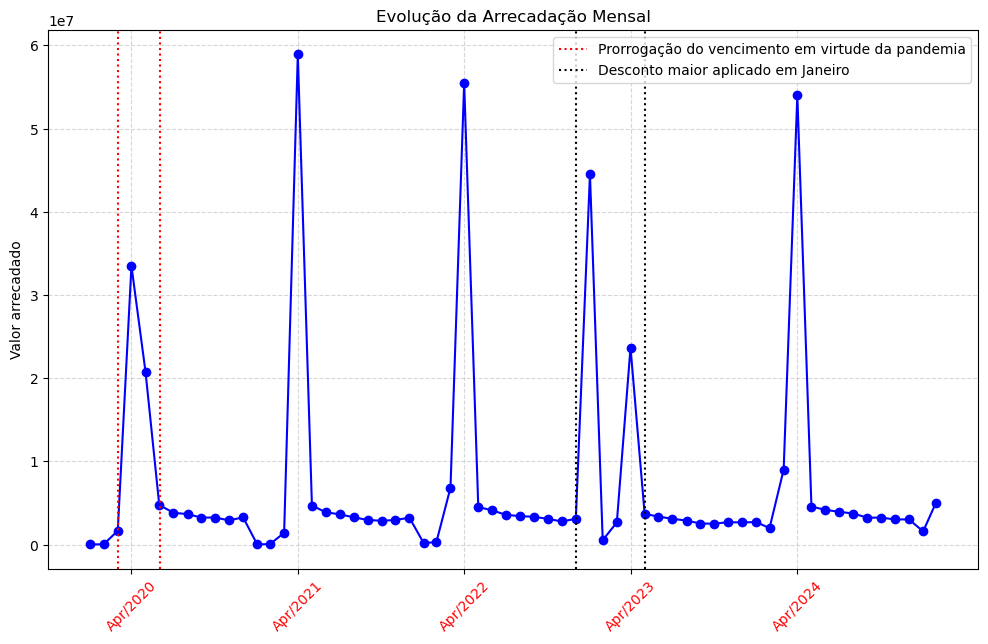

In [5]:
# Gerando os meses de Janeiro/2020 a Fevereiro/2025
datas = pd.date_range(start="2020-01", periods=62, freq='M')
valores = y

# Criando o gráfico de linha
plt.figure(figsize=(12, 7))
plt.plot(datas, valores, marker='o', linestyle='-', color='blue')

# Destacando no eixo X todos os meses de abril
meses_de_abril = datas[datas.month == 4]
plt.xticks(meses_de_abril, [d.strftime('%b/%Y') for d in meses_de_abril], rotation=45, fontsize=10, color='red')

# Adicionando linhas verticais pontilhadas em abril e maio de 2020
plt.axvline(pd.Timestamp("2020-04-01"), color='red', linestyle='dotted', linewidth=1.5, label="Prorrogação do vencimento em virtude da pandemia")
plt.axvline(pd.Timestamp("2020-07-01"), color='red', linestyle='dotted', linewidth=1.5)
plt.axvline(pd.Timestamp("2023-01-01"), color='black', linestyle='dotted', linewidth=1.5, label="Desconto maior aplicado em Janeiro")
plt.axvline(pd.Timestamp("2023-06-01"), color='black', linestyle='dotted', linewidth=1.5)

# Configurações extras
#plt.xlabel("Mês")
plt.ylabel("Valor arrecadado")
plt.title("Evolução da Arrecadação Mensal")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir gráfico
plt.show()

Temos por esse gráfico um padrão que se repete anualmento, com exeção de 2020 todos os outros ano possui um pico em abril, para verificar melhor esse padrão vamos gerar uma serie para cada ano, e verificar o boxplot dos meses

In [6]:
df['tributo'] = pd.to_datetime(df['tributo'])
df['mes'] = df['tributo'].dt.day
df['ano'] = df['tributo'].dt.year
df

,tributo,IPTUcorr,mes,ano
0,2020-01-01,21376.89,1,2020
1,2020-01-02,41832.60,2,2020
2,2020-01-03,1663832.69,3,2020
3,2020-01-04,33505347.02,4,2020
4,2020-01-05,20718642.98,5,2020
...,...,...,...,...
57,2024-01-10,3249468.78,10,2024
58,2024-01-11,3024348.76,11,2024
59,2024-01-12,3036529.53,12,2024
60,2025-01-01,1587212.85,1,2025


In [7]:
df

,tributo,IPTUcorr,mes,ano
0,2020-01-01,21376.89,1,2020
1,2020-01-02,41832.60,2,2020
2,2020-01-03,1663832.69,3,2020
3,2020-01-04,33505347.02,4,2020
4,2020-01-05,20718642.98,5,2020
...,...,...,...,...
57,2024-01-10,3249468.78,10,2024
58,2024-01-11,3024348.76,11,2024
59,2024-01-12,3036529.53,12,2024
60,2025-01-01,1587212.85,1,2025


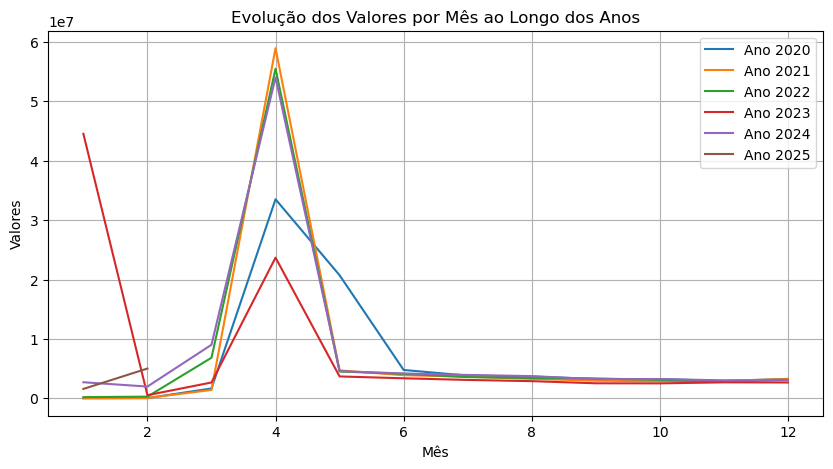

In [8]:
# Criar o gráfico
plt.figure(figsize=(10, 5))

# Iterar por cada ano e plotar uma linha
for ano, df in df.groupby("ano"):
    plt.plot(df["mes"], df["IPTUcorr"], label=f"Ano {ano}")

# Configurações do gráfico
plt.xlabel("Mês")
plt.ylabel("Valores")
plt.title("Evolução dos Valores por Mês ao Longo dos Anos")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [9]:
df = pd.read_csv('iptu_corrigido.txt', delimiter='\t', decimal=',')
df['tributo'] = pd.to_datetime(df['tributo'])
df['mes'] = df['tributo'].dt.day
df['ano'] = df['tributo'].dt.year
df

,tributo,IPTUcorr,mes,ano
0,2020-01-01,21376.89,1,2020
1,2020-01-02,41832.60,2,2020
2,2020-01-03,1663832.69,3,2020
3,2020-01-04,33505347.02,4,2020
4,2020-01-05,20718642.98,5,2020
...,...,...,...,...
57,2024-01-10,3249468.78,10,2024
58,2024-01-11,3024348.76,11,2024
59,2024-01-12,3036529.53,12,2024
60,2025-01-01,1587212.85,1,2025


<Figure size 1200x600 with 0 Axes>

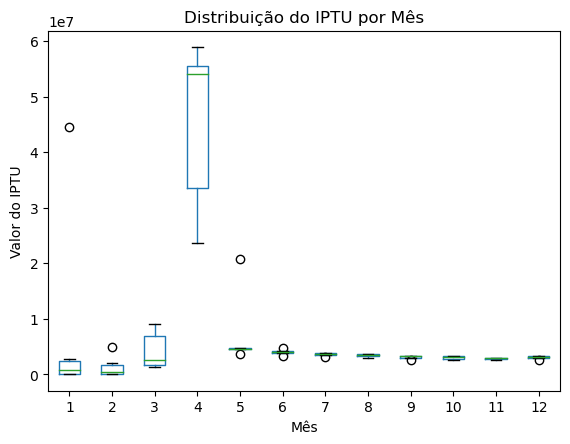

In [14]:
plt.figure(figsize=(12, 6))
df.boxplot(column='IPTUcorr', by='mes', grid=False)

# Ajustando o título
plt.title("Distribuição do IPTU por Mês")  # Define o título do gráfico
plt.suptitle("")  # Remove o título automático gerado pelo argumento 'by'
plt.xlabel("Mês")  # Define o rótulo do eixo X
plt.ylabel("Valor do IPTU")  # Define o rótulo do eixo Y

plt.show()

Com isso fica clara a sazonalidade e também podemos ver alguns outlayers, no caso de Janeiro temos em 2023 um ponto discrepante, isso ocorreu porque nesse ano teve um desconto maior para quem pagasse no primeiro mês, outro ponto discrepante com justificativa é no mês de maio de 2020, onde por conta da pandemia houve uma prorrogação do pagamento em cota unica para o mes de maio, por conta disso os valores pagos para esse mês em 2020 foi maior que o normal. Outro ponto discrepante é o mês de fevereiro de 2025 que possui um valor maior pago, isso pode ser justificado por nesse ano os valores terem sido inserido com antecedencia no sistema, por exemplo nos anos de 2020 a 2023 esses lançamento só eram incluidos em Março

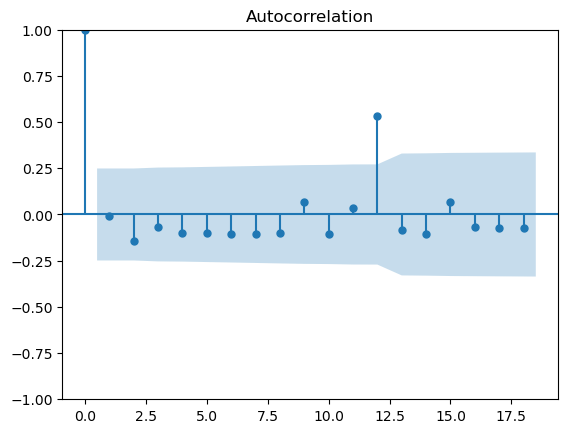

In [15]:
# Autocorrelation
plot_acf(y)
plt.show()

Como vemos existe sazonalidade anual (a cada 12 meses) nesse caso precisamos aplicar umadiferenciação sazonal ou utilizar um modelo sazonal, como o SARIMAX, mas antes vamos verificar se existe dencia de crescimento do valor arrecadado

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import normal_ad

C:\Users\IPMweverton\AppData\Local\Temp\ipykernel_2672\3118660373.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


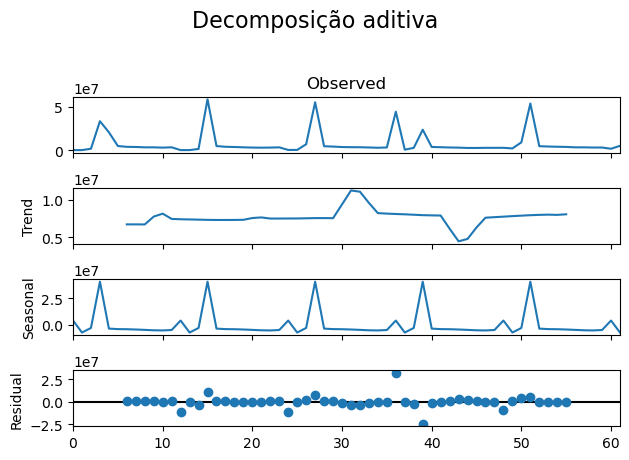

In [17]:
# Decompose
#multiplicative_decomposition = seasonal_decompose(y, model='multiplicative', period=244)
additive_decomposition = seasonal_decompose(y, model='additive', period=12)

# Plot ETS decomposition
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Decomposição aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

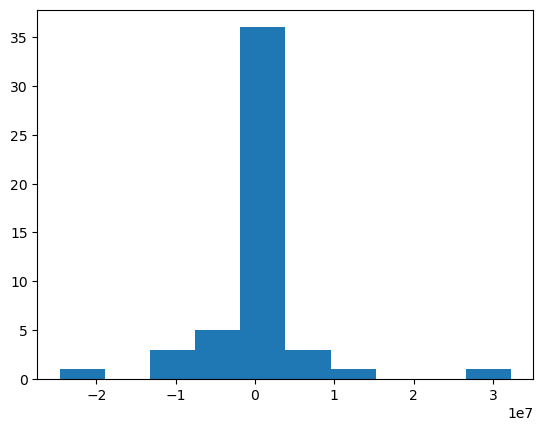

In [18]:
# Clean residuals from NaN values
#residualsM = multiplicative_decomposition.resid[~np.isnan(multiplicative_decomposition.resid)]
#plt.hist(residualsM)
#plt.show()

residualsA = additive_decomposition.resid[~np.isnan(additive_decomposition.resid)]
plt.hist(residualsA)
plt.show()

POdemos verificar que existe uma pequena tendencia de crescimento

# aplicando modelo para serie não estacionário por conta da sazonalidade

In [19]:
df = pd.read_csv('iptu_corrigido.txt', delimiter='\t', decimal=',')
df['tributo'] = pd.to_datetime(df['tributo'])
df['mes'] = df['tributo'].dt.day
df['ano'] = df['tributo'].dt.year
df['tributo'] = df['tributo'].dt.strftime('%Y-%m-%d')           ### alterar do tipo yyyy-dd-mm para yyyy-mm-dd, que é como o sarimax trabalha
df['ds'] = pd.to_datetime(df['tributo'], format='%Y-%d-%m')

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


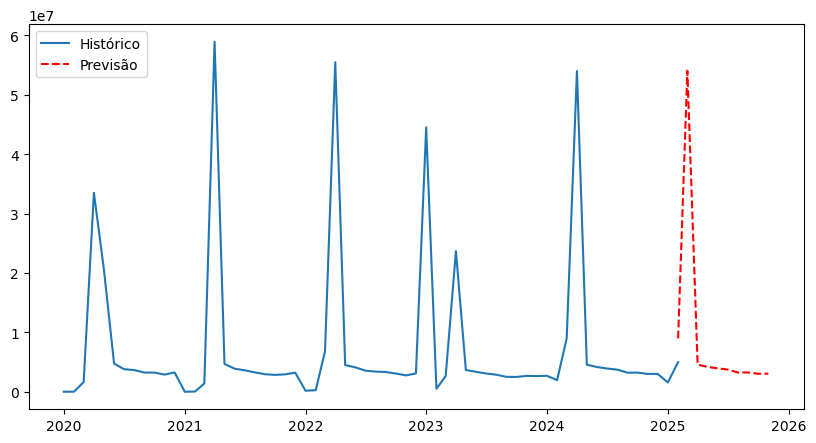

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Criar o DataFrame com datas mensais
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

# Ajustar modelo SARIMA (parâmetros P, D, Q sazonais e normais)
model = sm.tsa.statespace.SARIMAX(df['IPTUcorr'],
                                  order=(1,1,1),           # ARIMA(p,d,q)
                                  seasonal_order=(0,1,0,12), # Sazonalidade (P,D,Q,s) com s=12 para dados mensais
                                  enforce_stationarity=False,
                                  enforce_invertibility=True)

# Treinar o modelo
sarima_fit = model.fit()

# Fazer previsão para os próximos 12 meses
forecast_sarima = sarima_fit.get_forecast(steps=10)
forecast_index = pd.date_range(start=df.index[-1], periods=10, freq='MS')
forecast_values = forecast_sarima.predicted_mean

# Plotar o resultado
plt.figure(figsize=(10,5))
plt.plot(df.index, df['IPTUcorr'], label="Histórico")
plt.plot(forecast_index, forecast_values, label="Previsão", linestyle="dashed", color="red")
plt.legend()
plt.show()

In [21]:
forecast_values

2025-03-01    9.011612e+06
2025-04-01    5.403414e+07
2025-05-01    4.597131e+06
2025-06-01    4.213359e+06
2025-07-01    3.965123e+06
2025-08-01    3.766370e+06
2025-09-01    3.265039e+06
2025-10-01    3.274979e+06
2025-11-01    3.049859e+06
2025-12-01    3.062040e+06
Freq: MS, Name: predicted_mean, dtype: float64

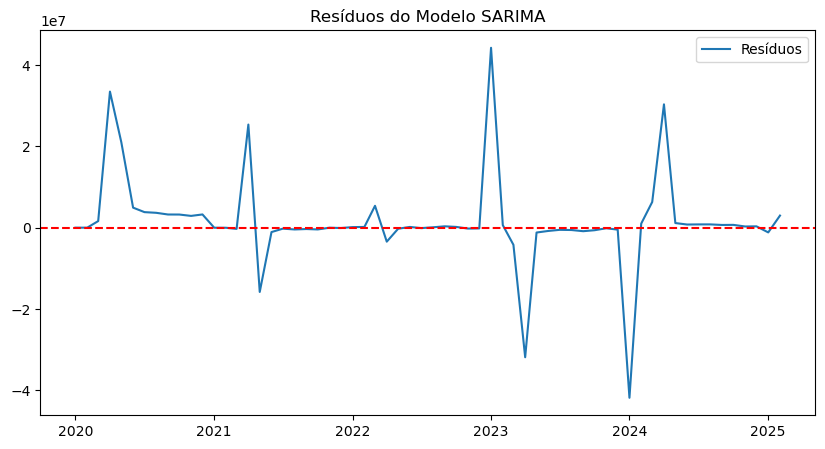

In [22]:
residuos = sarima_fit.resid

plt.figure(figsize=(10, 5))
plt.plot(residuos, label="Resíduos")
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.title("Resíduos do Modelo SARIMA")
plt.show()

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(ljung_box_test)

     lb_stat  lb_pvalue
10  8.335654   0.596087


In [24]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(residuos)
print(f"Jarque-Bera Teste: Estatística={jb_test[0]:.3f}, p-valor={jb_test[1]:.3f}")

Jarque-Bera Teste: Estatística=116.156, p-valor=0.000


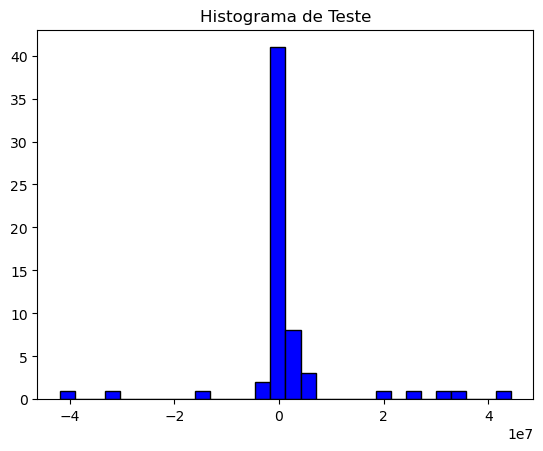

In [25]:
# Plotar histograma
plt.hist(residuos, bins=30, color="blue", edgecolor="black")
plt.title("Histograma de Teste")
plt.show()


In [26]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos)
print(f"Shapiro-Wilk Teste: Estatística={shapiro_test[0]:.3f}, p-valor={shapiro_test[1]:.3f}")


Shapiro-Wilk Teste: Estatística=0.636, p-valor=0.000


Gráficos de coluna

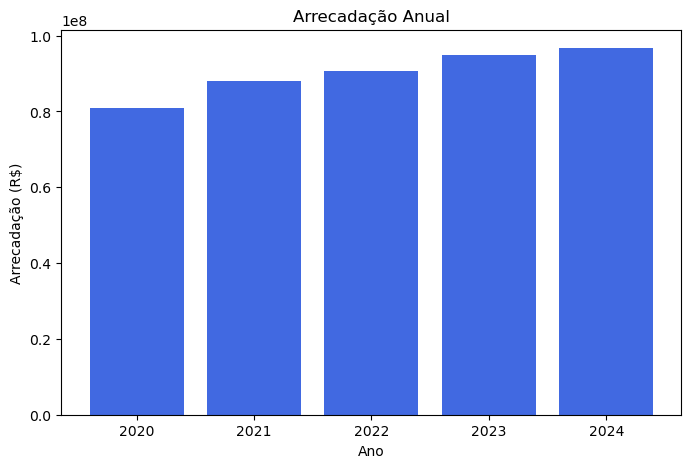

In [27]:
anos = [2020, 2021, 2022, 2023, 2024]
valores = [80923882.49, 87974411.36, 90781991.76, 94874699.05, 96706768.15]

# Criando um DataFrame (opcional)
df = pd.DataFrame({'Ano': anos, 'Arrecadação': valores})

# Criando o gráfico de colunas
plt.figure(figsize=(8, 5))
plt.bar(df['Ano'], df['Arrecadação'], color='royalblue')

# Adicionando rótulos
plt.xlabel("Ano")
plt.ylabel("Arrecadação (R$)")
plt.title("Arrecadação Anual")
plt.xticks(anos)  # Garantindo que todos os anos apareçam no eixo X

# Exibindo o gráfico
plt.show()

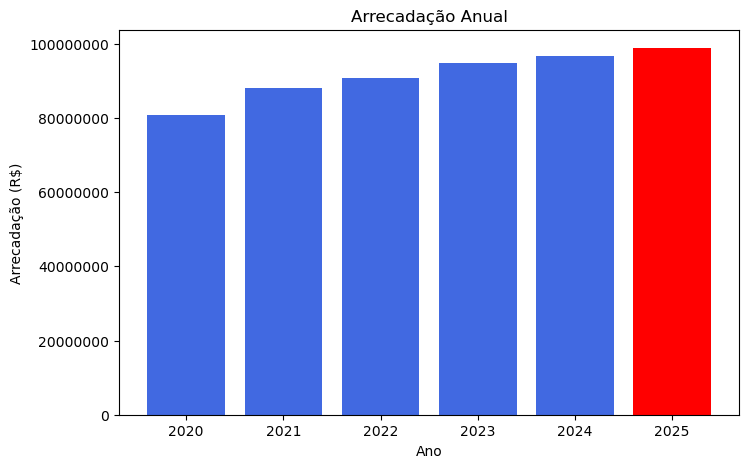

In [28]:
# Dados atualizados
anos = [2020, 2021, 2022, 2023, 2024, 2025]
valores = [80923882.49, 87974411.36, 90781991.76, 94874699.05, 96706768.15, 98842826.62]

# Criando um DataFrame (opcional)
df = pd.DataFrame({'Ano': anos, 'Arrecadação': valores})

# Definindo cores: azul para todos, vermelho para 2025
cores = ['royalblue'] * (len(anos) - 1) + ['red']

# Criando o gráfico de colunas
plt.figure(figsize=(8, 5))
plt.bar(df['Ano'], df['Arrecadação'], color=cores)

# Adicionando rótulos
plt.xlabel("Ano")
plt.ylabel("Arrecadação (R$)")
plt.title("Arrecadação Anual")
plt.xticks(anos)  # Garantindo que todos os anos apareçam no eixo X
plt.ticklabel_format(style='plain', axis='y')  # Evitar notação científica

# Exibindo o gráfico
plt.show()

# teste para os melhores parametros P e Q

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


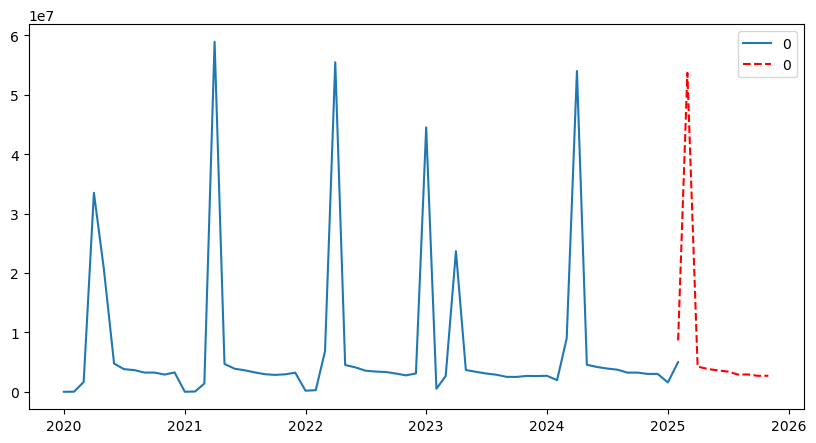

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


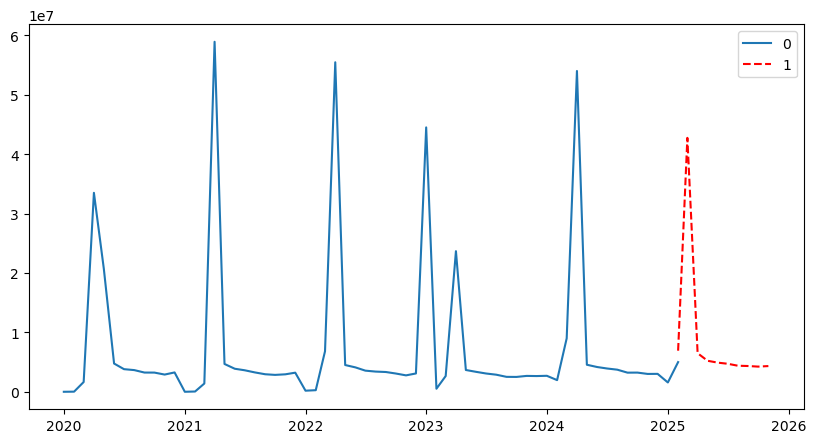

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


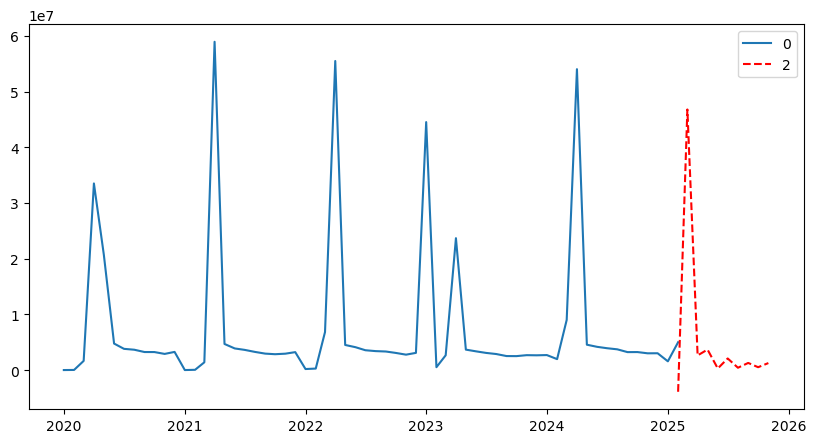

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


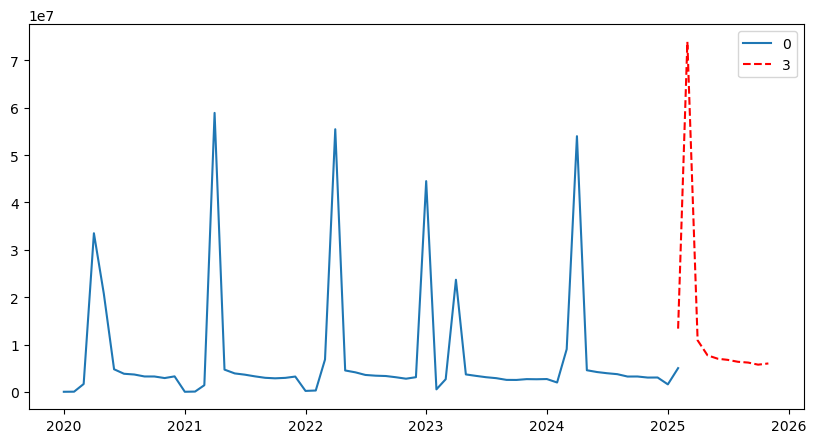

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


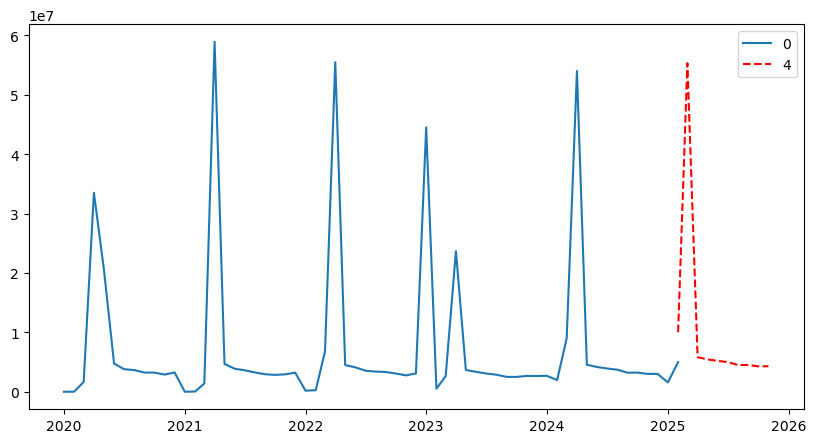

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


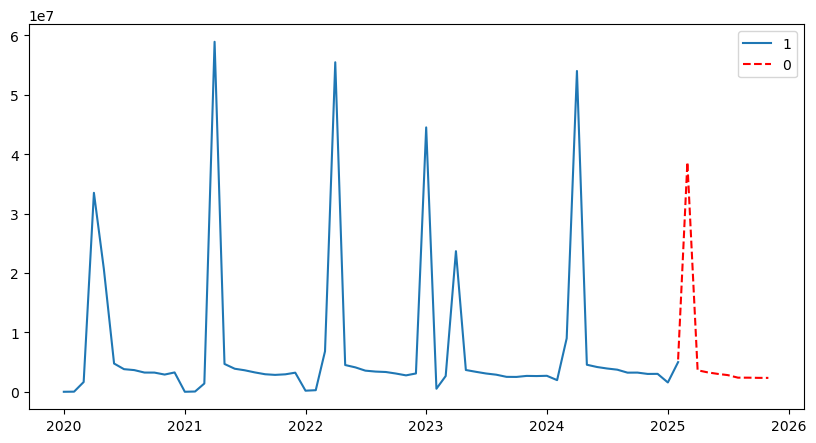

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


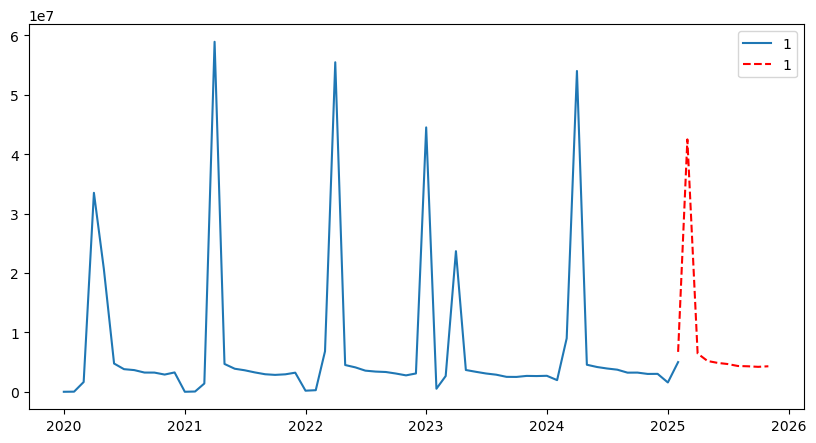

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


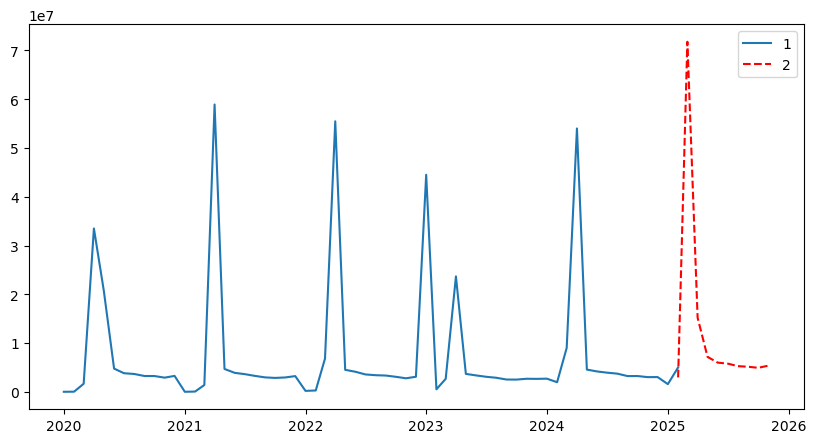

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization f

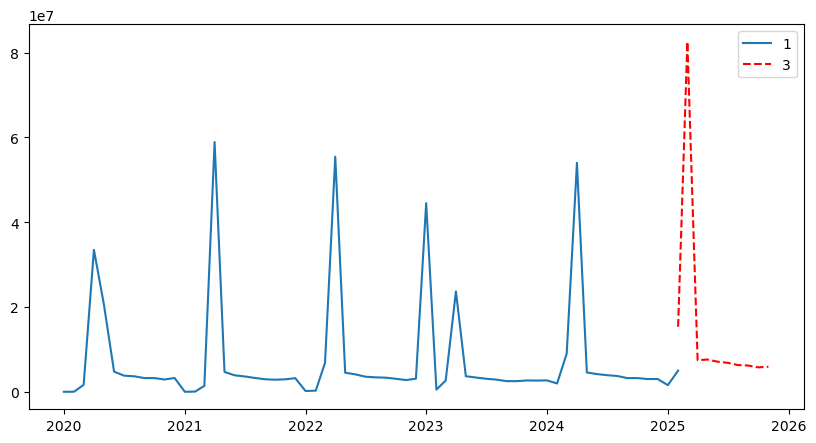

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


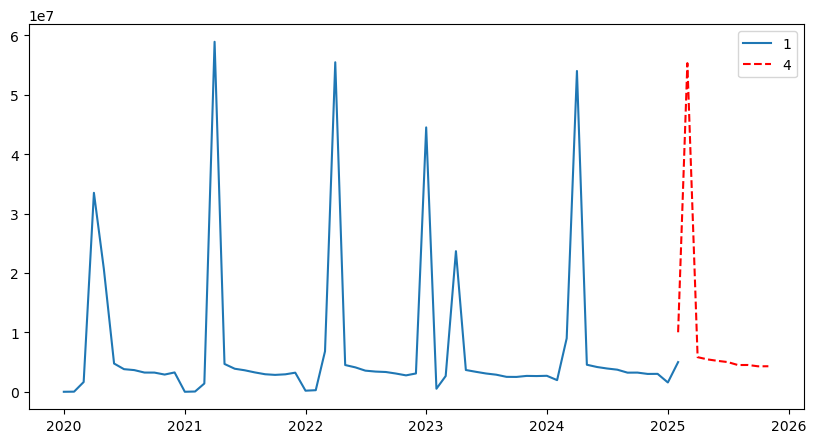

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


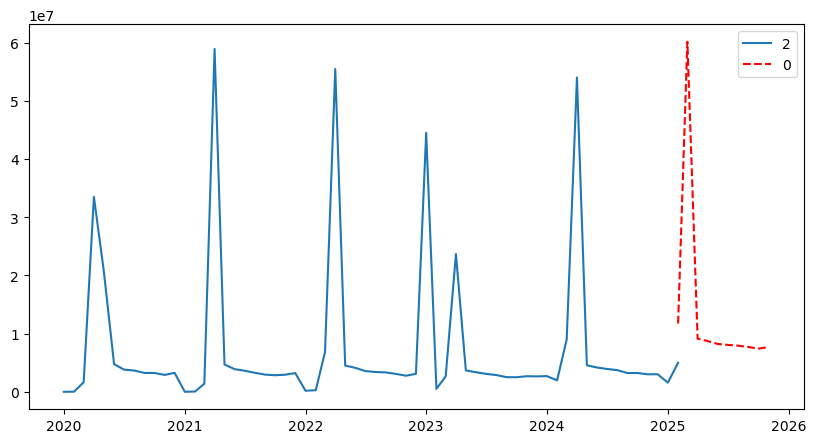

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


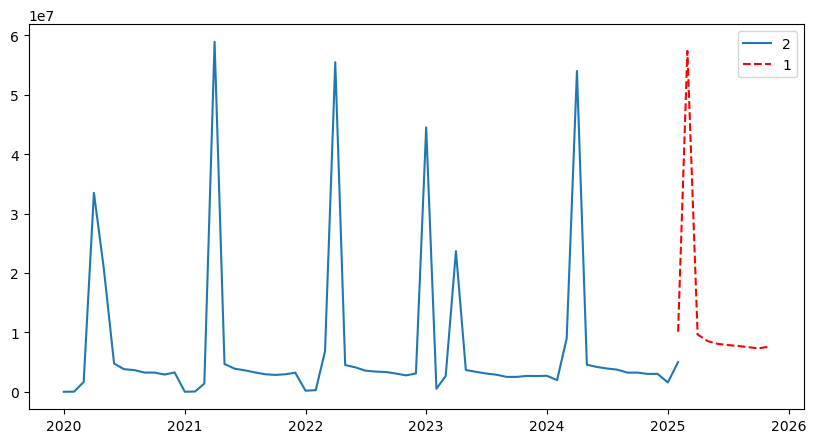

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


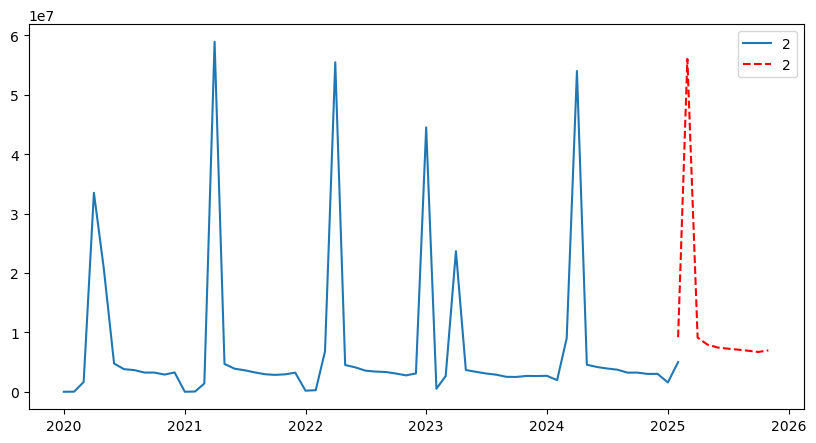

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization f

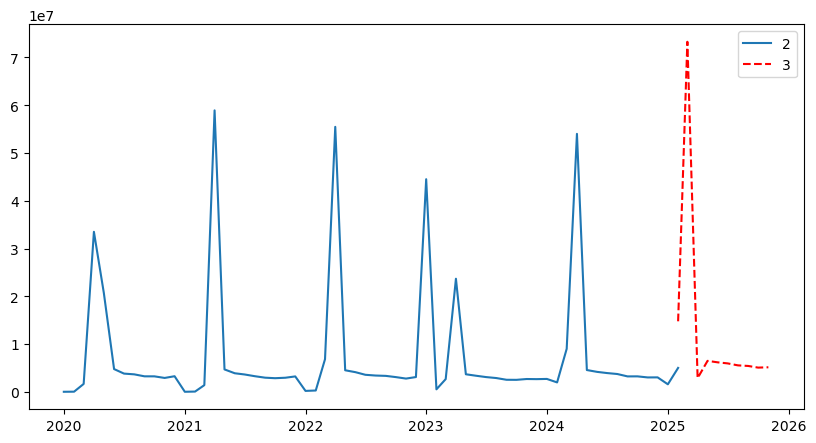

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


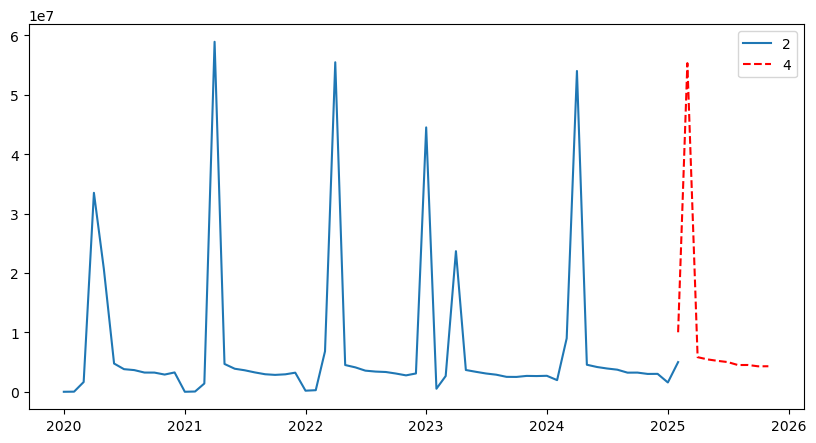

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


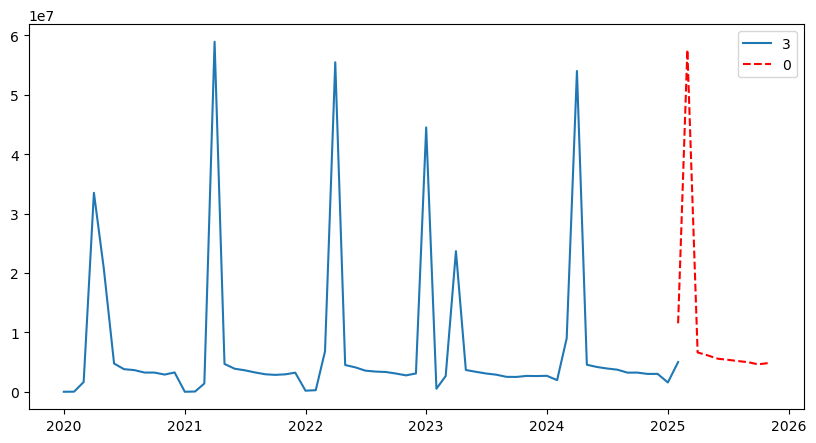

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


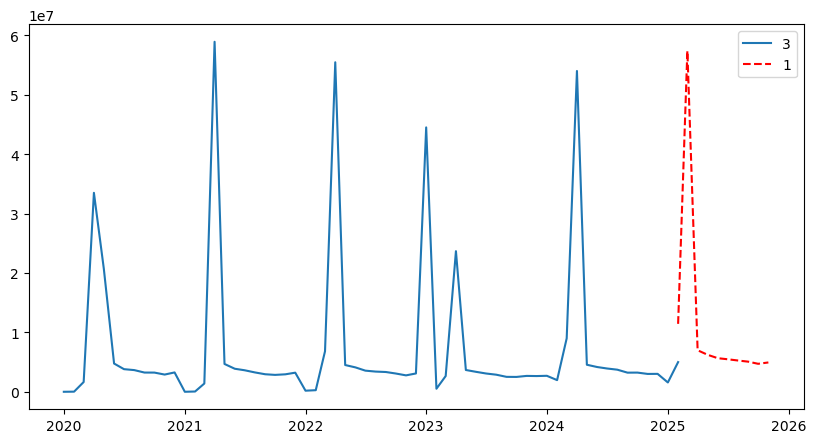

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


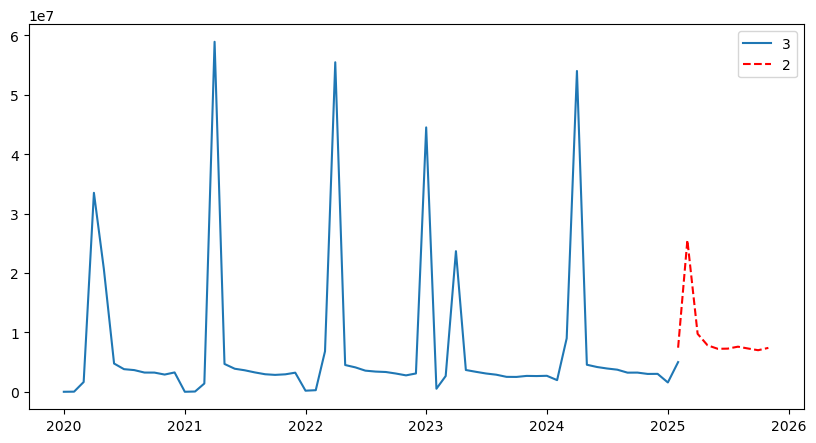

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization f

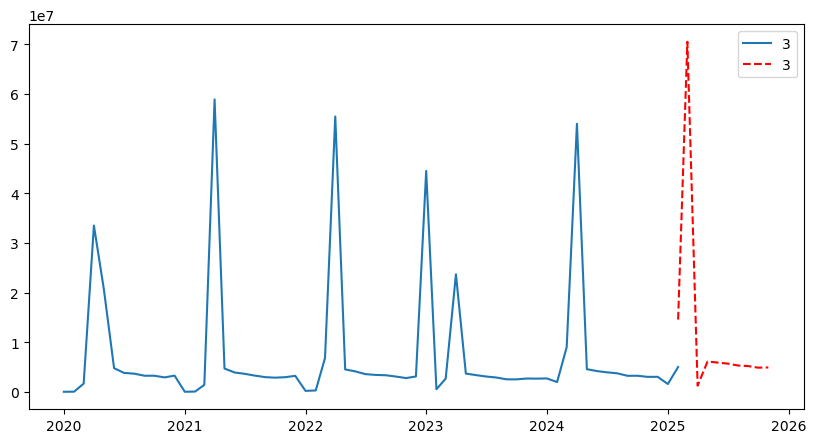

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


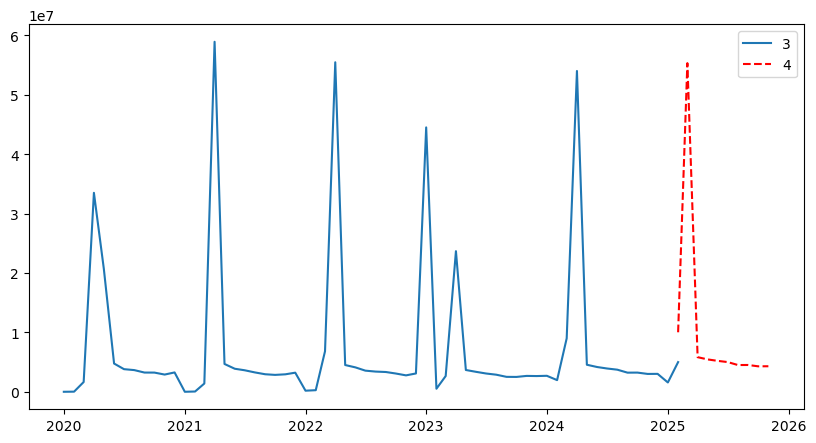

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


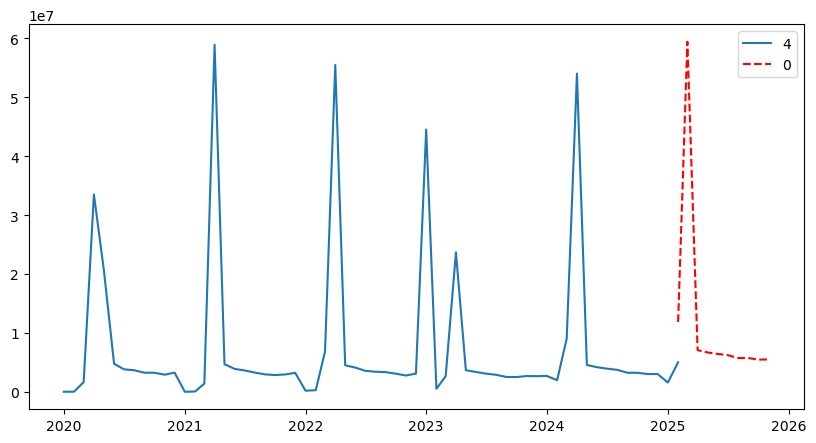

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


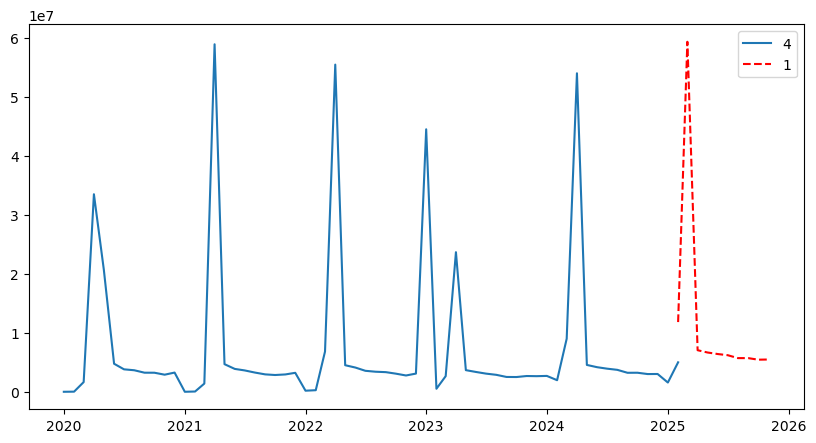

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


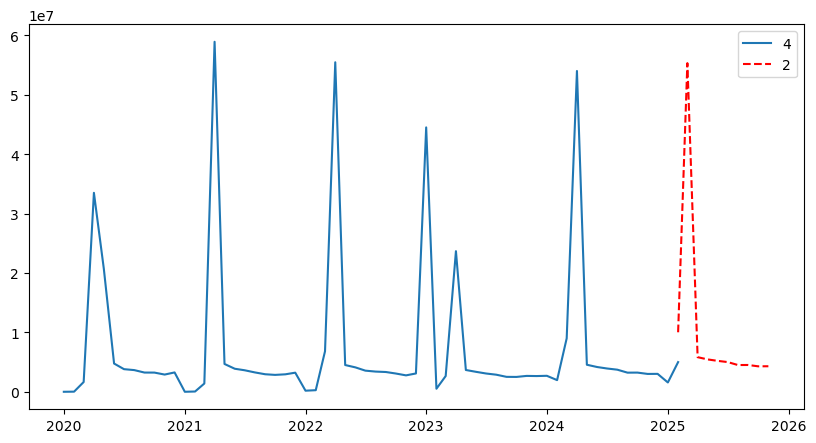

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


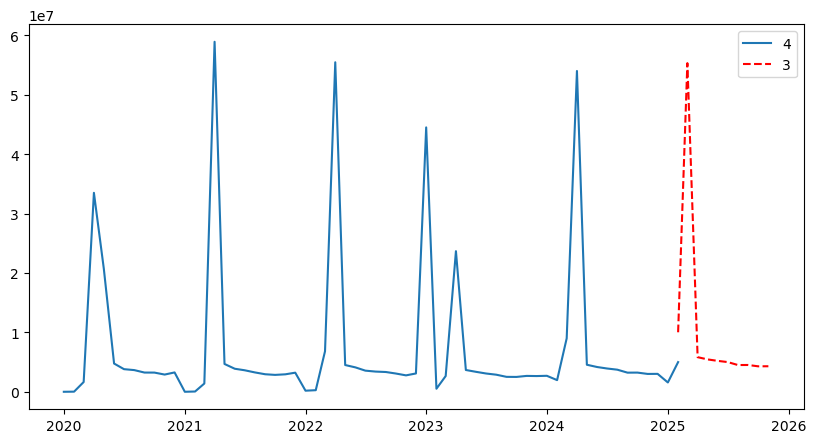

C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\IPMweverton\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


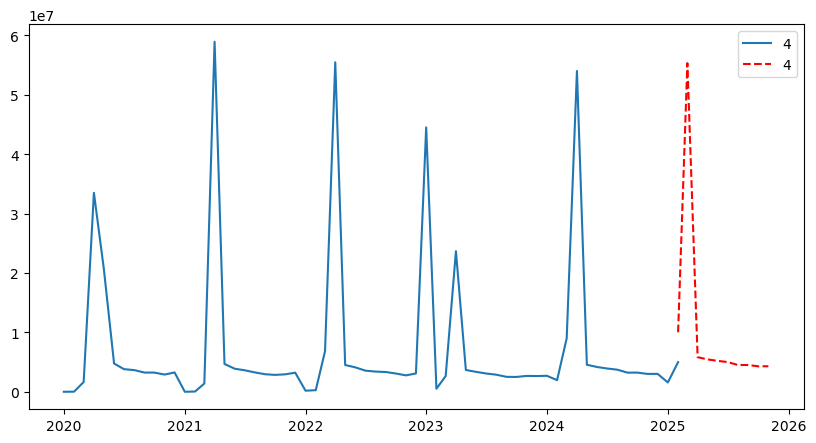

In [38]:
for i in range(0,5):
    for j in range(0,5):
        df = pd.read_csv('iptu_corrigido.txt', delimiter='\t', decimal=',')
        df['tributo'] = pd.to_datetime(df['tributo'])
        df['mes'] = df['tributo'].dt.day
        df['ano'] = df['tributo'].dt.year
        df['tributo'] = df['tributo'].dt.strftime('%Y-%m-%d')           ### alterar do tipo yyyy-dd-mm para yyyy-mm-dd, que é como o sarimax trabalha
        df['ds'] = pd.to_datetime(df['tributo'], format='%Y-%d-%m')
        # Criar o DataFrame com datas mensais
        df['ds'] = pd.to_datetime(df['ds'])
        df.set_index('ds', inplace=True)

        # Ajustar modelo SARIMA (parâmetros P, D, Q sazonais e normais)
        model = sm.tsa.statespace.SARIMAX(df['IPTUcorr'],
                                          order=(1,1,1),           # ARIMA(p,d,q)
                                          seasonal_order=(i,1,j,12), # Sazonalidade (P,D,Q,s) com s=12 para dados mensais
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        # Treinar o modelo
        sarima_fit = model.fit()

        # Fazer previsão para os próximos 12 meses
        forecast_sarima = sarima_fit.get_forecast(steps=10)
        forecast_index = pd.date_range(start=df.index[-1], periods=10, freq='MS')
        forecast_values = forecast_sarima.predicted_mean

        # Plotar o resultado
        plt.figure(figsize=(10,5))
        plt.plot(df.index, df['IPTUcorr'], label=i)
        plt.plot(forecast_index, forecast_values, label=j, linestyle="dashed", color="red")
        plt.legend()
        plt.show()